- mnist를 DNN으로 구현 : https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset
- 콜백함수

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 데이터셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩용
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input
from matplotlib import pyplot as plt # 학습과정 loss, acc 볼 때
np.random.seed(4)

In [2]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [3]:
print(data[0].shape)
print(data[0,0])
print(data[0,1:].reshape(28,28))

(785,)
5.0
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195. 

In [4]:
# 비추
# np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [5]:
for row in data[0,1:].reshape(28,-1):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

9.0

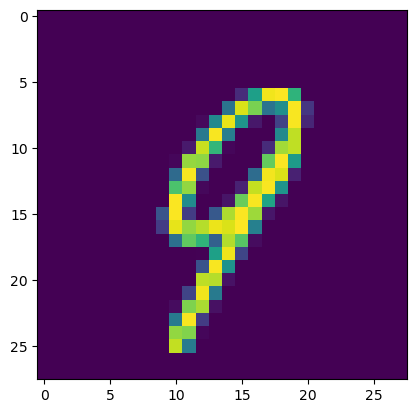

In [6]:
plt.imshow(data[22,1:].reshape(28,-1))
data[22,0]

## 위의 과정보다 더 많은 데이터를 라이브러리에서 가져옴

## 1. 데이터 생성 & 전처리

In [7]:
(X_train, y_train),(X_test, y_test)  = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
for row in X_train[0]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

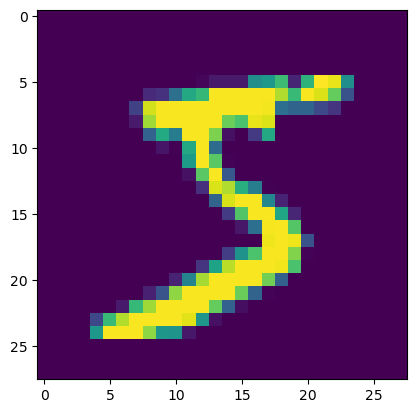

In [9]:
plt.imshow(X_train[0])
plt.show()

In [10]:
y_train[0]

5

In [11]:
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [12]:
# 훈련셋(학습시 사용), 검증셋(학습시 사용), 시험셋(평가시 사용)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [13]:
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0 으로 나눠)
X_train = X_train.reshape(-1, 784).astype('float32')/255.0
X_val = X_val.reshape(-1, 784).astype('float32')/255.0
X_test = X_test.reshape(-1, 784).astype('float32')/255.0
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [14]:
y_train = to_categorical(y_train).reshape(-1,10)
y_val = to_categorical(y_val).reshape(-1,10)
y_test = to_categorical(y_test).reshape(-1,10)
y_train.shape, y_val.shape, y_test.shape

((50000, 10), (10000, 10), (10000, 10))

In [15]:
# 훈련셋 (5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_indexs = np.random.choice(50000,700)
val_indexs = np.random.choice(10000,300)
X_train = X_train[train_indexs]
y_train = y_train[train_indexs]
X_val = X_val[val_indexs]
y_val = y_val[val_indexs]
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((700, 784), (300, 784), (700, 10), (300, 10))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


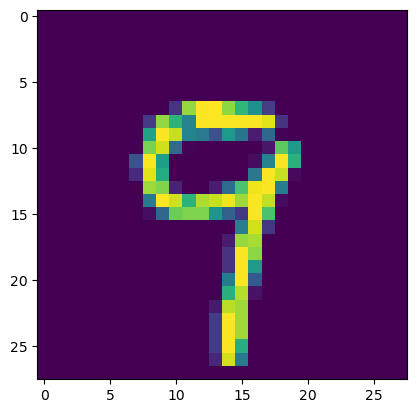

In [16]:
plt.imshow(X_train[5].reshape(-1, 28))
print(y_train[5])

## 2. 모델 구성하기
activation - https://keras.io/api/layers/activations/

In [17]:
model = Sequential()

model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


## 3. 모델학습과정 설정

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

## 4. 모델 학습

In [19]:
hist = model.fit(X_train, y_train, batch_size=100, epochs=1200,
                validation_data=(X_val, y_val))

Epoch 1/1200
7/7 [==============================] - 2s 45ms/step - loss: 2.3009 - accuracy: 0.0886 - val_loss: 2.2842 - val_accuracy: 0.0867
Epoch 2/1200
7/7 [==============================] - 0s 16ms/step - loss: 2.2595 - accuracy: 0.0971 - val_loss: 2.2366 - val_accuracy: 0.1267
Epoch 3/1200
7/7 [==============================] - 0s 13ms/step - loss: 2.2174 - accuracy: 0.1429 - val_loss: 2.1994 - val_accuracy: 0.1867
Epoch 4/1200
7/7 [==============================] - 0s 13ms/step - loss: 2.1822 - accuracy: 0.1886 - val_loss: 2.1695 - val_accuracy: 0.2133
Epoch 5/1200
7/7 [==============================] - 0s 12ms/step - loss: 2.1502 - accuracy: 0.2186 - val_loss: 2.1432 - val_accuracy: 0.2233
Epoch 6/1200
7/7 [==============================] - 0s 16ms/step - loss: 2.1223 - accuracy: 0.2357 - val_loss: 2.1197 - val_accuracy: 0.2467
Epoch 7/1200
7/7 [==============================] - 0s 13ms/step - loss: 2.0978 - accuracy: 0.2900 - val_loss: 2.0982 - val_accuracy: 0.2633
Epoch 8/1200


7/7 [==============================] - 0s 8ms/step - loss: 1.5967 - accuracy: 0.4129 - val_loss: 1.7229 - val_accuracy: 0.3700
Epoch 60/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.5919 - accuracy: 0.4186 - val_loss: 1.7201 - val_accuracy: 0.3733
Epoch 61/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5869 - accuracy: 0.4157 - val_loss: 1.7179 - val_accuracy: 0.3733
Epoch 62/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5832 - accuracy: 0.4186 - val_loss: 1.7154 - val_accuracy: 0.3733
Epoch 63/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5778 - accuracy: 0.4200 - val_loss: 1.7132 - val_accuracy: 0.3733
Epoch 64/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5737 - accuracy: 0.4214 - val_loss: 1.7108 - val_accuracy: 0.3767
Epoch 65/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5695 - accuracy: 0.4243 - val_loss: 1.7087 - val_accuracy: 0.3767
Epoch 66/1200
7/7 [========

Epoch 117/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.3885 - accuracy: 0.4829 - val_loss: 1.6454 - val_accuracy: 0.3933
Epoch 118/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3852 - accuracy: 0.4957 - val_loss: 1.6446 - val_accuracy: 0.4000
Epoch 119/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.3828 - accuracy: 0.4900 - val_loss: 1.6447 - val_accuracy: 0.4033
Epoch 120/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3784 - accuracy: 0.5029 - val_loss: 1.6448 - val_accuracy: 0.4033
Epoch 121/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.3751 - accuracy: 0.5057 - val_loss: 1.6439 - val_accuracy: 0.4033
Epoch 122/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3718 - accuracy: 0.5000 - val_loss: 1.6425 - val_accuracy: 0.4100
Epoch 123/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3691 - accuracy: 0.5086 - val_loss: 1.6437 - val_accuracy: 0.4100
Epo

7/7 [==============================] - 0s 11ms/step - loss: 1.2415 - accuracy: 0.5600 - val_loss: 1.6395 - val_accuracy: 0.4133
Epoch 175/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.2393 - accuracy: 0.5514 - val_loss: 1.6388 - val_accuracy: 0.4167
Epoch 176/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2376 - accuracy: 0.5514 - val_loss: 1.6383 - val_accuracy: 0.4167
Epoch 177/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.2349 - accuracy: 0.5586 - val_loss: 1.6390 - val_accuracy: 0.4200
Epoch 178/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.2329 - accuracy: 0.5629 - val_loss: 1.6389 - val_accuracy: 0.4200
Epoch 179/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2308 - accuracy: 0.5600 - val_loss: 1.6383 - val_accuracy: 0.4200
Epoch 180/1200
7/7 [==============================] - 0s 12ms/step - loss: 1.2289 - accuracy: 0.5657 - val_loss: 1.6401 - val_accuracy: 0.4100
Epoch 181/1200
7

7/7 [==============================] - 0s 9ms/step - loss: 1.1446 - accuracy: 0.5729 - val_loss: 1.6637 - val_accuracy: 0.4267
Epoch 232/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.1430 - accuracy: 0.5814 - val_loss: 1.6633 - val_accuracy: 0.4300
Epoch 233/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.1412 - accuracy: 0.5814 - val_loss: 1.6658 - val_accuracy: 0.4233
Epoch 234/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.1400 - accuracy: 0.5800 - val_loss: 1.6656 - val_accuracy: 0.4233
Epoch 235/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.1387 - accuracy: 0.5800 - val_loss: 1.6681 - val_accuracy: 0.4167
Epoch 236/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.1371 - accuracy: 0.5800 - val_loss: 1.6687 - val_accuracy: 0.4233
Epoch 237/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.1361 - accuracy: 0.5786 - val_loss: 1.6687 - val_accuracy: 0.4267
Epoch 238/1200
7/7

7/7 [==============================] - 0s 10ms/step - loss: 1.0733 - accuracy: 0.5971 - val_loss: 1.7085 - val_accuracy: 0.4233
Epoch 289/1200
7/7 [==============================] - 0s 14ms/step - loss: 1.0724 - accuracy: 0.6000 - val_loss: 1.7098 - val_accuracy: 0.4233
Epoch 290/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.0711 - accuracy: 0.5957 - val_loss: 1.7106 - val_accuracy: 0.4267
Epoch 291/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.0702 - accuracy: 0.5943 - val_loss: 1.7128 - val_accuracy: 0.4267
Epoch 292/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.0693 - accuracy: 0.5957 - val_loss: 1.7139 - val_accuracy: 0.4267
Epoch 293/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.0683 - accuracy: 0.5943 - val_loss: 1.7138 - val_accuracy: 0.4267
Epoch 294/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.0671 - accuracy: 0.5929 - val_loss: 1.7151 - val_accuracy: 0.4267
Epoch 295/1200
7/

7/7 [==============================] - 0s 9ms/step - loss: 1.0205 - accuracy: 0.6214 - val_loss: 1.7695 - val_accuracy: 0.4267
Epoch 346/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.0193 - accuracy: 0.6214 - val_loss: 1.7691 - val_accuracy: 0.4267
Epoch 347/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.0183 - accuracy: 0.6229 - val_loss: 1.7703 - val_accuracy: 0.4267
Epoch 348/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.0178 - accuracy: 0.6229 - val_loss: 1.7706 - val_accuracy: 0.4267
Epoch 349/1200
7/7 [==============================] - 0s 14ms/step - loss: 1.0172 - accuracy: 0.6257 - val_loss: 1.7720 - val_accuracy: 0.4333
Epoch 350/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.0166 - accuracy: 0.6229 - val_loss: 1.7736 - val_accuracy: 0.4267
Epoch 351/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.0154 - accuracy: 0.6229 - val_loss: 1.7739 - val_accuracy: 0.4333
Epoch 352/1200
7/7

Epoch 403/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.9765 - accuracy: 0.6400 - val_loss: 1.8316 - val_accuracy: 0.4200
Epoch 404/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.9760 - accuracy: 0.6429 - val_loss: 1.8311 - val_accuracy: 0.4333
Epoch 405/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.9755 - accuracy: 0.6443 - val_loss: 1.8315 - val_accuracy: 0.4233
Epoch 406/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.9751 - accuracy: 0.6471 - val_loss: 1.8347 - val_accuracy: 0.4300
Epoch 407/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.9738 - accuracy: 0.6429 - val_loss: 1.8354 - val_accuracy: 0.4267
Epoch 408/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.9728 - accuracy: 0.6400 - val_loss: 1.8339 - val_accuracy: 0.4300
Epoch 409/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9724 - accuracy: 0.6414 - val_loss: 1.8378 - val_accuracy: 0.4200
Epoch

7/7 [==============================] - 0s 9ms/step - loss: 0.9372 - accuracy: 0.6614 - val_loss: 1.8892 - val_accuracy: 0.4233
Epoch 461/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.9361 - accuracy: 0.6629 - val_loss: 1.8911 - val_accuracy: 0.4233
Epoch 462/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9355 - accuracy: 0.6629 - val_loss: 1.8900 - val_accuracy: 0.4233
Epoch 463/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.9345 - accuracy: 0.6657 - val_loss: 1.8965 - val_accuracy: 0.4233
Epoch 464/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.9339 - accuracy: 0.6614 - val_loss: 1.8934 - val_accuracy: 0.4200
Epoch 465/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.9331 - accuracy: 0.6629 - val_loss: 1.8945 - val_accuracy: 0.4233
Epoch 466/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.9330 - accuracy: 0.6643 - val_loss: 1.8960 - val_accuracy: 0.4233
Epoch 467/1200
7/7 [

7/7 [==============================] - 0s 8ms/step - loss: 0.8996 - accuracy: 0.6757 - val_loss: 1.9528 - val_accuracy: 0.4167
Epoch 518/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.8986 - accuracy: 0.6743 - val_loss: 1.9551 - val_accuracy: 0.4233
Epoch 519/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.8979 - accuracy: 0.6743 - val_loss: 1.9618 - val_accuracy: 0.4200
Epoch 520/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.8977 - accuracy: 0.6743 - val_loss: 1.9541 - val_accuracy: 0.4233
Epoch 521/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.8968 - accuracy: 0.6757 - val_loss: 1.9581 - val_accuracy: 0.4100
Epoch 522/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.8963 - accuracy: 0.6757 - val_loss: 1.9596 - val_accuracy: 0.4200
Epoch 523/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.8954 - accuracy: 0.6800 - val_loss: 1.9647 - val_accuracy: 0.4267
Epoch 524/1200
7/7

7/7 [==============================] - 0s 10ms/step - loss: 0.8655 - accuracy: 0.6814 - val_loss: 2.0185 - val_accuracy: 0.4233
Epoch 575/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.8645 - accuracy: 0.6829 - val_loss: 2.0145 - val_accuracy: 0.4233
Epoch 576/1200
7/7 [==============================] - 0s 23ms/step - loss: 0.8643 - accuracy: 0.6814 - val_loss: 2.0227 - val_accuracy: 0.4233
Epoch 577/1200
7/7 [==============================] - 0s 17ms/step - loss: 0.8633 - accuracy: 0.6843 - val_loss: 2.0162 - val_accuracy: 0.4233
Epoch 578/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.8628 - accuracy: 0.6829 - val_loss: 2.0265 - val_accuracy: 0.4167
Epoch 579/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.8623 - accuracy: 0.6829 - val_loss: 2.0234 - val_accuracy: 0.4200
Epoch 580/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.8613 - accuracy: 0.6857 - val_loss: 2.0230 - val_accuracy: 0.4200
Epoch 581/1200

7/7 [==============================] - 0s 11ms/step - loss: 0.8336 - accuracy: 0.6871 - val_loss: 2.0883 - val_accuracy: 0.4200
Epoch 632/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.8332 - accuracy: 0.6857 - val_loss: 2.0958 - val_accuracy: 0.4233
Epoch 633/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.8324 - accuracy: 0.6900 - val_loss: 2.0996 - val_accuracy: 0.4233
Epoch 634/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.8318 - accuracy: 0.6900 - val_loss: 2.0947 - val_accuracy: 0.4200
Epoch 635/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.8317 - accuracy: 0.6900 - val_loss: 2.1002 - val_accuracy: 0.4233
Epoch 636/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.8312 - accuracy: 0.6871 - val_loss: 2.0998 - val_accuracy: 0.4233
Epoch 637/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.8308 - accuracy: 0.6871 - val_loss: 2.0964 - val_accuracy: 0.4200
Epoch 638/1200
7/

7/7 [==============================] - 0s 9ms/step - loss: 0.8078 - accuracy: 0.6929 - val_loss: 2.1672 - val_accuracy: 0.4167
Epoch 689/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.8079 - accuracy: 0.6900 - val_loss: 2.1665 - val_accuracy: 0.4200
Epoch 690/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.8071 - accuracy: 0.6929 - val_loss: 2.1702 - val_accuracy: 0.4267
Epoch 691/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.8067 - accuracy: 0.6914 - val_loss: 2.1629 - val_accuracy: 0.4233
Epoch 692/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.8064 - accuracy: 0.6957 - val_loss: 2.1726 - val_accuracy: 0.4200
Epoch 693/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.8058 - accuracy: 0.6914 - val_loss: 2.1675 - val_accuracy: 0.4167
Epoch 694/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.8052 - accuracy: 0.6957 - val_loss: 2.1815 - val_accuracy: 0.4267
Epoch 695/1200
7/7 

7/7 [==============================] - 0s 9ms/step - loss: 0.7840 - accuracy: 0.7014 - val_loss: 2.2438 - val_accuracy: 0.4233
Epoch 746/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.7835 - accuracy: 0.7029 - val_loss: 2.2439 - val_accuracy: 0.4233
Epoch 747/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.7829 - accuracy: 0.7014 - val_loss: 2.2503 - val_accuracy: 0.4267
Epoch 748/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.7828 - accuracy: 0.7014 - val_loss: 2.2502 - val_accuracy: 0.4200
Epoch 749/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.7819 - accuracy: 0.7000 - val_loss: 2.2379 - val_accuracy: 0.4200
Epoch 750/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.7823 - accuracy: 0.7000 - val_loss: 2.2506 - val_accuracy: 0.4200
Epoch 751/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.7815 - accuracy: 0.7029 - val_loss: 2.2567 - val_accuracy: 0.4233
Epoch 752/1200
7/

7/7 [==============================] - 0s 10ms/step - loss: 0.7632 - accuracy: 0.7114 - val_loss: 2.3248 - val_accuracy: 0.4167
Epoch 803/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.7629 - accuracy: 0.7100 - val_loss: 2.3321 - val_accuracy: 0.4167
Epoch 804/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.7624 - accuracy: 0.7071 - val_loss: 2.3313 - val_accuracy: 0.4167
Epoch 805/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.7621 - accuracy: 0.7100 - val_loss: 2.3356 - val_accuracy: 0.4133
Epoch 806/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.7617 - accuracy: 0.7086 - val_loss: 2.3320 - val_accuracy: 0.4167
Epoch 807/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.7613 - accuracy: 0.7114 - val_loss: 2.3373 - val_accuracy: 0.4167
Epoch 808/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.7610 - accuracy: 0.7100 - val_loss: 2.3409 - val_accuracy: 0.4133
Epoch 809/1200
7

7/7 [==============================] - 0s 9ms/step - loss: 0.7432 - accuracy: 0.7129 - val_loss: 2.4234 - val_accuracy: 0.4100
Epoch 860/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.7431 - accuracy: 0.7100 - val_loss: 2.4250 - val_accuracy: 0.4067
Epoch 861/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.7427 - accuracy: 0.7129 - val_loss: 2.4262 - val_accuracy: 0.4067
Epoch 862/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.7423 - accuracy: 0.7186 - val_loss: 2.4361 - val_accuracy: 0.4067
Epoch 863/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.7420 - accuracy: 0.7157 - val_loss: 2.4377 - val_accuracy: 0.4100
Epoch 864/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.7416 - accuracy: 0.7143 - val_loss: 2.4237 - val_accuracy: 0.4067
Epoch 865/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.7414 - accuracy: 0.7157 - val_loss: 2.4271 - val_accuracy: 0.4067
Epoch 866/1200
7

7/7 [==============================] - 0s 10ms/step - loss: 0.7201 - accuracy: 0.7157 - val_loss: 2.5265 - val_accuracy: 0.4067
Epoch 917/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.7201 - accuracy: 0.7214 - val_loss: 2.5242 - val_accuracy: 0.4067
Epoch 918/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.7200 - accuracy: 0.7229 - val_loss: 2.5263 - val_accuracy: 0.4067
Epoch 919/1200
7/7 [==============================] - 0s 15ms/step - loss: 0.7194 - accuracy: 0.7186 - val_loss: 2.5247 - val_accuracy: 0.4067
Epoch 920/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.7191 - accuracy: 0.7214 - val_loss: 2.5284 - val_accuracy: 0.4067
Epoch 921/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.7188 - accuracy: 0.7200 - val_loss: 2.5302 - val_accuracy: 0.4067
Epoch 922/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.7184 - accuracy: 0.7200 - val_loss: 2.5356 - val_accuracy: 0.4067
Epoch 923/1200


7/7 [==============================] - 0s 11ms/step - loss: 0.7019 - accuracy: 0.7300 - val_loss: 2.6282 - val_accuracy: 0.4133
Epoch 974/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.7018 - accuracy: 0.7286 - val_loss: 2.6335 - val_accuracy: 0.4100
Epoch 975/1200
7/7 [==============================] - 0s 17ms/step - loss: 0.7015 - accuracy: 0.7300 - val_loss: 2.6344 - val_accuracy: 0.4100
Epoch 976/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.7010 - accuracy: 0.7314 - val_loss: 2.6369 - val_accuracy: 0.4133
Epoch 977/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.7010 - accuracy: 0.7300 - val_loss: 2.6360 - val_accuracy: 0.4100
Epoch 978/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.7005 - accuracy: 0.7357 - val_loss: 2.6441 - val_accuracy: 0.4133
Epoch 979/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.7003 - accuracy: 0.7329 - val_loss: 2.6379 - val_accuracy: 0.4067
Epoch 980/1200


7/7 [==============================] - 0s 7ms/step - loss: 0.6868 - accuracy: 0.7400 - val_loss: 2.7453 - val_accuracy: 0.4100
Epoch 1031/1200
7/7 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.7414 - val_loss: 2.7436 - val_accuracy: 0.4100
Epoch 1032/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.6865 - accuracy: 0.7429 - val_loss: 2.7383 - val_accuracy: 0.4100
Epoch 1033/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.6862 - accuracy: 0.7443 - val_loss: 2.7449 - val_accuracy: 0.4100
Epoch 1034/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6865 - accuracy: 0.7386 - val_loss: 2.7439 - val_accuracy: 0.4100
Epoch 1035/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.6859 - accuracy: 0.7443 - val_loss: 2.7408 - val_accuracy: 0.4100
Epoch 1036/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6856 - accuracy: 0.7429 - val_loss: 2.7592 - val_accuracy: 0.4067
Epoch 1037/12

7/7 [==============================] - 0s 6ms/step - loss: 0.6740 - accuracy: 0.7514 - val_loss: 2.8551 - val_accuracy: 0.4067
Epoch 1088/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6737 - accuracy: 0.7529 - val_loss: 2.8580 - val_accuracy: 0.4067
Epoch 1089/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6734 - accuracy: 0.7471 - val_loss: 2.8567 - val_accuracy: 0.4033
Epoch 1090/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6735 - accuracy: 0.7514 - val_loss: 2.8544 - val_accuracy: 0.4033
Epoch 1091/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6732 - accuracy: 0.7486 - val_loss: 2.8644 - val_accuracy: 0.4067
Epoch 1092/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6728 - accuracy: 0.7514 - val_loss: 2.8676 - val_accuracy: 0.4033
Epoch 1093/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6727 - accuracy: 0.7471 - val_loss: 2.8592 - val_accuracy: 0.4033
Epoch 1094/1200

7/7 [==============================] - 0s 8ms/step - loss: 0.6571 - accuracy: 0.7586 - val_loss: 2.9847 - val_accuracy: 0.3933
Epoch 1145/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6567 - accuracy: 0.7571 - val_loss: 2.9863 - val_accuracy: 0.3967
Epoch 1146/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6566 - accuracy: 0.7586 - val_loss: 2.9984 - val_accuracy: 0.3967
Epoch 1147/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6563 - accuracy: 0.7586 - val_loss: 2.9942 - val_accuracy: 0.3933
Epoch 1148/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6558 - accuracy: 0.7586 - val_loss: 2.9950 - val_accuracy: 0.3933
Epoch 1149/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.6557 - accuracy: 0.7586 - val_loss: 3.0128 - val_accuracy: 0.3933
Epoch 1150/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.6558 - accuracy: 0.7614 - val_loss: 3.0062 - val_accuracy: 0.3967
Epoch 1151/120

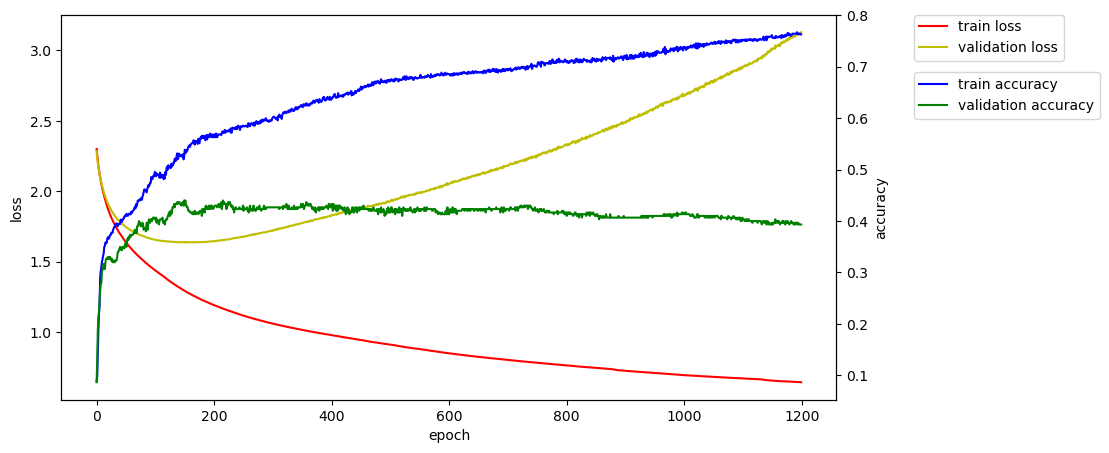

In [20]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
acc_ax.legend(bbox_to_anchor=(1.1, .85), loc=2, borderaxespad=0.)
plt.show()

## ※콜백함수1

In [21]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 epoch 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback): # on_epoch_end()는 각 epoch 종료시 자동 호출
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%50 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss{}, val_acc:{}'.format(self.epoch, 
                                                                             logs.get('loss'),
                                                                             logs.get('accuracy'),
                                                                             logs.get('val_loss'),
                                                                             logs.get('val_accuracy')))
# 1. 데이터 준비하기
(X_train, y_train),(X_test, y_test)  = mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0 으로 나눠)
# 종속변수 전처리 : 원핫 인코딩
X_train = X_train.reshape(-1, 784).astype('float32')/255.0
X_val = X_val.reshape(-1, 784).astype('float32')/255.0
X_test = X_test.reshape(-1, 784).astype('float32')/255.0
y_train = to_categorical(y_train).reshape(-1,10)
y_val = to_categorical(y_val).reshape(-1,10)
y_test = to_categorical(y_test).reshape(-1,10)
# 훈련셋 (5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_indexs = np.random.choice(50000,700)
val_indexs = np.random.choice(10000,300)
X_train = X_train[train_indexs]
y_train = y_train[train_indexs]
X_val = X_val[val_indexs]
y_val = y_val[val_indexs]
# 모델 구성하기
model = Sequential()

model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
# 모델 학습하기
custom_history=CustomHistory()
hist = model.fit(X_train, y_train, batch_size=100, epochs=1200,
                 validation_data=(X_val, y_val),
                 verbose=0,
                 callbacks=[custom_history])

epoch:50, loss:1.6279425621032715, acc:0.40142858028411865, val_loss1.7044951915740967, val_acc:0.3799999952316284
epoch:100, loss:1.3668262958526611, acc:0.5014285445213318, val_loss1.5485402345657349, val_acc:0.44333332777023315
epoch:150, loss:1.2108120918273926, acc:0.5542857050895691, val_loss1.495060682296753, val_acc:0.4399999976158142
epoch:200, loss:1.0978974103927612, acc:0.5828571319580078, val_loss1.4884920120239258, val_acc:0.47999998927116394
epoch:250, loss:1.0118294954299927, acc:0.618571400642395, val_loss1.5117307901382446, val_acc:0.5066666603088379
epoch:300, loss:0.9433910846710205, acc:0.6571428775787354, val_loss1.5600006580352783, val_acc:0.5
epoch:350, loss:0.8843161463737488, acc:0.6828571557998657, val_loss1.617369532585144, val_acc:0.5099999904632568
epoch:400, loss:0.8357545733451843, acc:0.7028571367263794, val_loss1.687475562095642, val_acc:0.4933333396911621
epoch:450, loss:0.7960749268531799, acc:0.7071428298950195, val_loss1.7733091115951538, val_acc:0

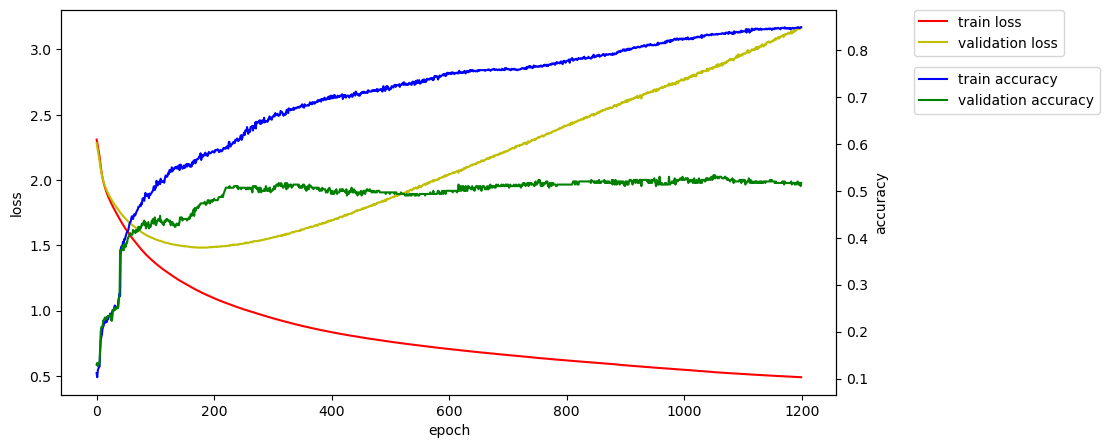

In [22]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
acc_ax.legend(bbox_to_anchor=(1.1, .85), loc=2, borderaxespad=0.)
plt.show()

## ※콜백함수2 - Early Stopping(조기 종료)
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료

In [23]:


# 1. 데이터 준비하기
(X_train, y_train),(X_test, y_test)  = mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0 으로 나눠)
# 종속변수 전처리 : 원핫 인코딩
X_train = X_train.reshape(-1, 784).astype('float32')/255.0
X_val = X_val.reshape(-1, 784).astype('float32')/255.0
X_test = X_test.reshape(-1, 784).astype('float32')/255.0
y_train = to_categorical(y_train).reshape(-1,10)
y_val = to_categorical(y_val).reshape(-1,10)
y_test = to_categorical(y_test).reshape(-1,10)
# 훈련셋 (5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_indexs = np.random.choice(50000,700)
val_indexs = np.random.choice(10000,300)
X_train = X_train[train_indexs]
y_train = y_train[train_indexs]
X_val = X_val[val_indexs]
y_val = y_val[val_indexs]
# 모델 구성하기
model = Sequential()

model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
# 모델 학습하기
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=4) # val_loss가 연달아 4번이상 성능이 좋아지지 않으면 stop
hist = model.fit(X_train, y_train, batch_size=100, epochs=1200,
                 validation_data=(X_val, y_val),
                 verbose=1,
                 callbacks=[early_stopping])

Epoch 1/1200
7/7 [==============================] - 1s 31ms/step - loss: 2.2979 - accuracy: 0.0457 - val_loss: 2.2778 - val_accuracy: 0.0533
Epoch 2/1200
7/7 [==============================] - 0s 11ms/step - loss: 2.2637 - accuracy: 0.0971 - val_loss: 2.2516 - val_accuracy: 0.1100
Epoch 3/1200
7/7 [==============================] - 0s 10ms/step - loss: 2.2314 - accuracy: 0.1300 - val_loss: 2.2258 - val_accuracy: 0.1100
Epoch 4/1200
7/7 [==============================] - 0s 10ms/step - loss: 2.1959 - accuracy: 0.1771 - val_loss: 2.2083 - val_accuracy: 0.2400
Epoch 5/1200
7/7 [==============================] - 0s 10ms/step - loss: 2.1641 - accuracy: 0.2500 - val_loss: 2.1826 - val_accuracy: 0.2467
Epoch 6/1200
7/7 [==============================] - 0s 10ms/step - loss: 2.1339 - accuracy: 0.2629 - val_loss: 2.1616 - val_accuracy: 0.2467
Epoch 7/1200
7/7 [==============================] - 0s 10ms/step - loss: 2.1068 - accuracy: 0.2829 - val_loss: 2.1423 - val_accuracy: 0.2533
Epoch 8/1200


7/7 [==============================] - 0s 9ms/step - loss: 1.5825 - accuracy: 0.4214 - val_loss: 1.7347 - val_accuracy: 0.3200
Epoch 60/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.5771 - accuracy: 0.4186 - val_loss: 1.7311 - val_accuracy: 0.3300
Epoch 61/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5728 - accuracy: 0.4243 - val_loss: 1.7278 - val_accuracy: 0.3333
Epoch 62/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.5684 - accuracy: 0.4186 - val_loss: 1.7260 - val_accuracy: 0.3267
Epoch 63/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.5634 - accuracy: 0.4214 - val_loss: 1.7220 - val_accuracy: 0.3300
Epoch 64/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.5589 - accuracy: 0.4229 - val_loss: 1.7190 - val_accuracy: 0.3300
Epoch 65/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.5544 - accuracy: 0.4257 - val_loss: 1.7180 - val_accuracy: 0.3233
Epoch 66/1200
7/7 [======

7/7 [==============================] - 0s 19ms/step - loss: 1.3837 - accuracy: 0.4614 - val_loss: 1.6244 - val_accuracy: 0.3600
Epoch 118/1200
7/7 [==============================] - 0s 16ms/step - loss: 1.3811 - accuracy: 0.4614 - val_loss: 1.6224 - val_accuracy: 0.3667
Epoch 119/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3785 - accuracy: 0.4643 - val_loss: 1.6211 - val_accuracy: 0.3667
Epoch 120/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.3761 - accuracy: 0.4643 - val_loss: 1.6205 - val_accuracy: 0.3667
Epoch 121/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3738 - accuracy: 0.4629 - val_loss: 1.6187 - val_accuracy: 0.3700
Epoch 122/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3713 - accuracy: 0.4643 - val_loss: 1.6188 - val_accuracy: 0.3733
Epoch 123/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3687 - accuracy: 0.4643 - val_loss: 1.6184 - val_accuracy: 0.3733
Epoch 124/1200
7/7

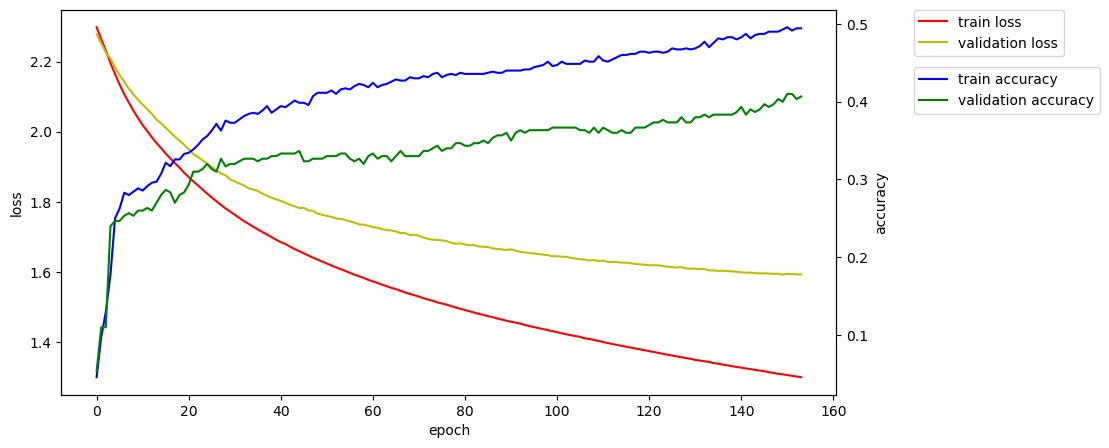

In [24]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
acc_ax.legend(bbox_to_anchor=(1.1, .85), loc=2, borderaxespad=0.)
plt.show()

위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 레이어
- 활성화 함수 : 은닉층에는 주로 relu계열
- optimizer, epoch등을 조정

In [25]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 에코크 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback): # on_epoch_end()는 각 에포크 종료시 자동 호출
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%5 ==0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.\
                 format(self.epoch, 
                        logs.get('loss'), 
                        logs.get('accuracy'),
                        logs.get('val_loss'),
                        logs.get('val_accuracy')
                       ))
# 1. 데이터 셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32')/255.0
X_val   = X_val.reshape(-1, 784).astype('float32')/255.0
X_test  = X_test.reshape(-1,784).astype('float32')/255.0
# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
# train_idxs = np.random.choice(50000, 700)
# val_idxs   = np.random.choice(10000, 300)
# X_train = X_train[train_idxs]
# Y_train = Y_train[train_idxs]
# X_val = X_val[val_idxs]
# Y_val = Y_val[val_idxs]
# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val   = to_categorical(Y_val, 10)
Y_test  = to_categorical(Y_test)
# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=64, activation='relu'))# https://keras.io/api/layers/activations/
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
print(model.summary())
# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
# 4. 모델 학습(콜백 적용)
from tensorflow.keras.callbacks import EarlyStopping
#earlyStopping = EarlyStopping(patience=2) # val_loss가 연달아 2번 이상 성능이 좋아지지 않으면 stop
# earlyStopping = EarlyStopping(patience=2, 
#                     # val_accuracy가 연달아 2번이상 성능이 좋아지 않으면 stop
#                     monitor='val_accuracy' # loss, accuracy, val_loss(기본값), val_accuracy
#                     ) # 성급한 조기종료
earlyStopping = EarlyStopping(patience=20)
customHistory = CustomHistory()
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=100,
                 validation_data=(X_val, Y_val),
                callbacks=[earlyStopping, customHistory],
                verbose=0)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 16)                1040      
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________
None
epoch:5, loss:0.10403033345937729, acc:0.9693199992179871, val_loss:0.11519628763198853, val_acc:0.9679999947547913
epoch:10, loss:0.051464393734931946, acc:0.9853000044822693, val_loss:0.10064452141523361, val_acc:0.9685999751091003
epoch:15, loss:0.028088467195630074, acc:0.991919994354248, val_loss:0.1047

## 5. 모델 평가 (그래프, 평가함수)

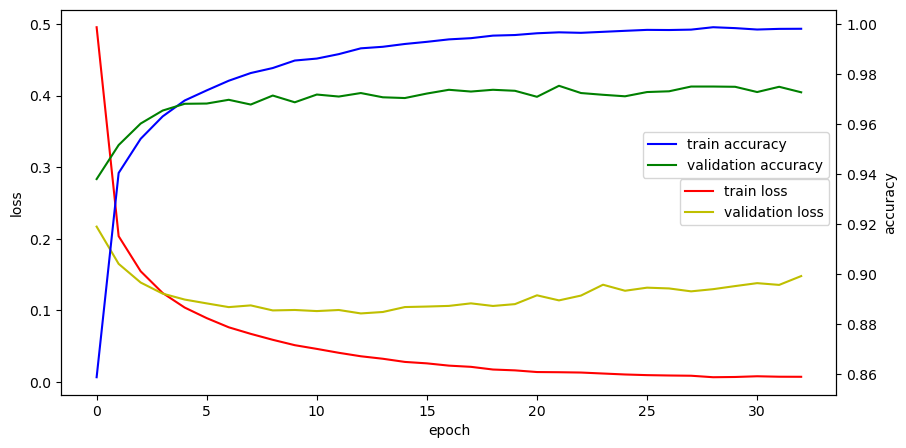

In [26]:
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [27]:
# 모델 평가
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=100)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

100/100 [==============================] - 0s 3ms/step - loss: 0.1377 - accuracy: 0.9708
loss : 0.1377030611038208
accuracy : 0.97079998254776


## 6.모델 저장
- 1. 학습된 모델 저장 : h5파일(모델 로드시 추가 학습이 필요X)
- 2. 모델 구성만 저장 : json파일 (모델 로드시 추가 학습이 필요 o)

In [28]:
# 1. 학습된 모델 저장
model.save('model/mnist.h5')

In [29]:
# 학습된 모델 로드하기
from tensorflow.keras.models import load_model
model2 = load_model('model/mnist.h5')
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 16)                1040      
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [30]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1377 - accuracy: 0.9708


[0.13770301640033722, 0.97079998254776]

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


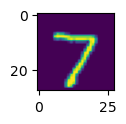

In [31]:
plt.figure(figsize=(1,1))
plt.imshow(X_test[0].reshape(28,28))
print(Y_test[0])
print(Y_test[0].argmax())
plt.show()

In [32]:
# 모델 사용하기
X_test[0].shape

(784,)

In [33]:
result = model2.predict(X_test[0].reshape(1,784))
print('실제값(원핫인코딩) :', Y_test[0])
print('실제값 :', Y_test[0].argmax())
print('예측값(원핫인코딩) :', [round(r, 5) for r in result[0]])
print('예측값 :', result.argmax())

1/1 [==============================] - 0s 82ms/step
실제값(원핫인코딩) : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
실제값 : 7
예측값(원핫인코딩) : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
예측값 : 7


In [34]:
# 2. 모델의 구조만 저장
model_json = model.to_json()
with open('model/mnist.json', 'w') as f:
    f.write(model_json)

In [35]:
# 저장된 모델 구성 가져오기
with open('model/mnist.json', 'r') as f:
    model_json2 = f.read()

In [36]:
from tensorflow.keras.models import model_from_json
model3 = model_from_json(model_json2)
model3.summary() # 학습전 모델

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 16)                1040      
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [37]:
model3.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=['accuracy'])
model3.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3276 - accuracy: 0.1111


[2.3275692462921143, 0.11110000312328339]

In [38]:
model3.fit(X_train, Y_train, epochs=100, batch_size=500,
          validation_data=[X_val, Y_val],
          callbacks=[earlyStopping])

Epoch 1/100
100/100 [==============================] - 1s 6ms/step - loss: 0.8961 - accuracy: 0.7687 - val_loss: 0.3501 - val_accuracy: 0.9085
Epoch 2/100
100/100 [==============================] - 1s 6ms/step - loss: 0.3104 - accuracy: 0.9140 - val_loss: 0.2473 - val_accuracy: 0.9303
Epoch 3/100
100/100 [==============================] - 1s 5ms/step - loss: 0.2400 - accuracy: 0.9321 - val_loss: 0.2061 - val_accuracy: 0.9445
Epoch 4/100
100/100 [==============================] - 1s 6ms/step - loss: 0.2052 - accuracy: 0.9407 - val_loss: 0.1817 - val_accuracy: 0.9491
Epoch 5/100
100/100 [==============================] - 1s 6ms/step - loss: 0.1788 - accuracy: 0.9483 - val_loss: 0.1654 - val_accuracy: 0.9543
Epoch 6/100
100/100 [==============================] - 1s 5ms/step - loss: 0.1594 - accuracy: 0.9539 - val_loss: 0.1513 - val_accuracy: 0.9576
Epoch 7/100
100/100 [==============================] - 1s 6ms/step - loss: 0.1439 - accuracy: 0.9584 - val_loss: 0.1427 - val_accuracy: 0.9604

In [39]:
model3.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1028 - accuracy: 0.9715


[0.10275599360466003, 0.9714999794960022]

In [40]:
# 다중분류의 교차표

In [41]:
# 1. 데이터 셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32')/255.0
X_val   = X_val.reshape(-1, 784).astype('float32')/255.0
X_test  = X_test.reshape(-1,784).astype('float32')/255.0
# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val   = to_categorical(Y_val, 10)
Y_test  = to_categorical(Y_test)
model = load_model('model/mnist.h5')

In [42]:
Y_test.argmax(axis=1) # 실제값

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [43]:
Y_hat = model.predict(X_test).argmax(axis=1)
Y_hat

313/313 [==============================] - 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [44]:
ctab = pd.crosstab(Y_test.argmax(axis=1), Y_hat)
ctab.index.name = '실제'
ctab.columns.name = '예측'
ctab

예측,0,1,2,3,4,5,6,7,8,9
실제,,,,,,,,,,
0,967,1,2,1,1,1,4,2,1,0
1,0,1124,3,2,2,1,1,0,2,0
2,4,1,1001,7,3,2,2,6,6,0
3,2,0,3,987,0,4,0,5,8,1
4,0,0,4,2,964,1,1,4,1,5
5,3,0,1,11,3,865,2,1,5,1
6,6,3,4,2,8,7,928,0,0,0
7,1,4,9,4,6,0,0,995,5,4
8,2,0,5,10,4,8,4,6,933,2
